In [3]:
# this notebook will use decision transformer in offline reinforcement learning setting to create bot for trading stock

# import utility libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import gym library
import gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv

# import helper functions on getting stock data
from getstock import get_stock_data_yf

# import Technical Analysis functions
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from ta.volume import OnBalanceVolumeIndicator

In [4]:
# get apple stock data
stock_data = get_stock_data_yf('AAPL', 2, '1d')

# initialize the technical indicators
sma = SMAIndicator(close=stock_data['Close'], window=12, fillna=True)
rsi = RSIIndicator(stock_data['Close'], window=12, fillna=True)
obv = OnBalanceVolumeIndicator(stock_data['Close'], stock_data['Volume'], fillna=True)

# add custom indicators to the stock data
stock_data['SMA'] = sma.sma_indicator()
stock_data['RSI'] = rsi.rsi()
stock_data['OBV'] = obv.on_balance_volume()

[*********************100%***********************]  1 of 1 completed


In [5]:
# show the last 15 rows of the stock data with the custom indicators
stock_data.tail(15)

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2022-10-11,139.899994,141.350006,138.220001,138.979996,138.979996,77033700,144.409997,33.606169,-233747300
2022-10-12,139.130005,140.360001,138.160004,138.339996,138.339996,70433700,143.374163,32.856803,-304181000
2022-10-13,134.990005,143.589996,134.369995,142.990005,142.990005,113224000,142.643331,42.941407,-190957000
2022-10-14,144.309998,144.520004,138.190002,138.380005,138.380005,88512300,141.688332,36.940756,-279469300
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,141.682499,44.356113,-194218400
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,142.144999,46.632506,-95081800
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,142.262499,46.827311,-33323500
2022-10-20,143.020004,145.889999,142.649994,143.389999,143.389999,64522000,142.036666,46.043905,-97845500
2022-10-21,142.869995,147.850006,142.649994,147.270004,147.270004,86464700,142.109166,53.108724,-11380800


In [6]:
# helper function to add the custom indicators to the environment
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low','Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

# create the custom environment with signal features
class CustomStockEnv(StocksEnv):
    _process_data = add_signals

custenv = CustomStockEnv(df=stock_data, window_size=1, frame_bound=(1, 20))


<class 'int'>
<class 'numpy.ndarray'>
<class 'int'>
<class 'bool'>
<class 'dict'>


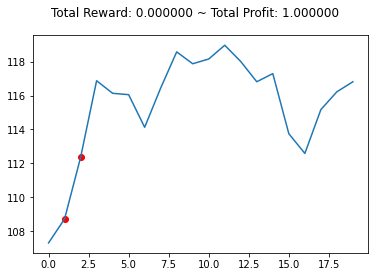

None


In [10]:
custenv.reset()
# sample actions from the action space
actions = custenv.action_space.sample()
state, reward, done, info = custenv.step(actions)
print(type(actions))
print(type(state))
print(type(reward))
print(type(done))
print(type(info))


print(custenv.render())